In [1]:
from ipynb.fs.full.config_helper import get_agg_config

import warnings
warnings.filterwarnings("ignore")

In [2]:
NUM_OF_PARTIES = 20
ROUNDS = 30
EPOCHS = 6

dataset='femnist'

In [3]:
from ibmfl.aggregator.aggregator import Aggregator

agg_config = get_agg_config(NUM_OF_PARTIES, ROUNDS, EPOCHS)
aggregator = Aggregator(config_dict=agg_config)

aggregator.start()

Yaml configuration file not found: log_config.yaml


2021-06-06T12:13:01.039Z | 1.0.5 | INFO | ibmfl.util.config                                  | Getting Aggregator details from arguments.
2021-06-06T12:13:01.039Z | 1.0.5 | INFO | ibmfl.util.config                                  | No data config provided for this setup.
2021-06-06T12:13:01.040Z | 1.0.5 | INFO | ibmfl.util.config                                  | No metrics recorder config provided for this setup.
2021-06-06T12:13:01.040Z | 1.0.5 | INFO | ibmfl.util.config                                  | No model config provided for this setup.
2021-06-06T12:13:01.350Z | 1.0.5 | INFO | ibmfl.util.config                                  | No data config provided for this setup.
2021-06-06T12:13:01.352Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | RestSender initialized
2021-06-06T12:13:01.352Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.START
2021-06-06T12:13:01.353Z | 1.0.5 | INFO | ibmfl.connection.flask_connection 

2021-06-06T12:14:47.714Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :6
2021-06-06T12:14:47.716Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Adding party with id party13
2021-06-06T12:14:47.716Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of registered parties:13
2021-06-06T12:14:47.718Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:14:47] "POST /6 HTTP/1.1" 200 -
2021-06-06T12:14:54.456Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :6
2021-06-06T12:14:54.457Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Adding party with id party14
2021-06-06T12:14:54.458Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of registered parties:14
2021-06-06T12:14:54.459Z | 1.0.5 | INFO | werkzeug                               

In [4]:
eval_party_acc = [[] for _ in range(NUM_OF_PARTIES)]
eval_party_loss = [[] for _ in range(NUM_OF_PARTIES)]
train_party_acc = [[] for _ in range(NUM_OF_PARTIES)]
train_party_loss = [[] for _ in range(NUM_OF_PARTIES)]
iterations = [[] for _ in range(NUM_OF_PARTIES)]

def get_metrics(metrics):
    keys = list(metrics['party'].keys())
    keys.sort()
    for i in range(len(keys)):
        eval_party_acc[i].append(metrics['party'][keys[i]]['test']['acc'])
        eval_party_loss[i].append(metrics['party'][keys[i]]['test']['loss'])
        train_party_acc[i].extend(metrics['party'][keys[i]]['train']['acc'])
        train_party_loss[i].extend(metrics['party'][keys[i]]['train']['loss'])
        iterations[i].append(metrics['fusion']['curr_round']*agg_config['hyperparams']['local']['training']['epochs'])

mh = aggregator.fusion.metrics_manager
mh.register(get_metrics)


aggregator.start_training()

2021-06-06T12:15:38.815Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating Global Training.
2021-06-06T12:15:38.816Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Warm start disabled.
2021-06-06T12:15:38.816Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model updateNone
2021-06-06T12:15:38.817Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-06T12:15:38.817Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-06T12:15:39.530Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-06T12:15:39.531Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-06T12:15:39.531Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-06T12:15:39.532

2021-06-06T12:17:41.419Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:17:41.421Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:17:41.425Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:17:41.466Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:17:41] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:17:41.519Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:17:41] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:17:41.615Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:17:41] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:17:41.617Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:17:41] "POST /7 HTTP/1.1" 200 -


2021-06-06T12:19:03.354Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:19:03.355Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:19:03.357Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:19:03.358Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:19:03.375Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:75
2021-06-06T12:19:03.399Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:19:03] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:19:03.443Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:19:03] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:19:03.527Z | 1.0.5 | INFO | werkzeug                  

2021-06-06T12:20:25.603Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:20:25.604Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:20:25.605Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:20:25.606Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:20:25.607Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:20:25.608Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:20:25.609Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:20:25.610Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-

2021-06-06T12:21:44.821Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:21:44.823Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:21:44] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:21:44.824Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:21:44.826Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:21:44.840Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:21:44.864Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:21:44.865Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:21:44] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:21:44.866Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-06T12:23:06.084Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:23:06.085Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:23:06] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:23:06.152Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:23:06.153Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:23:06] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:23:06.155Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:23:06.155Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:23:06.180Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:23:06.203Z | 1.0.5 | INFO | werkzeug                

2021-06-06T12:24:23.077Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:24:23.173Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:24:23] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:24:23.397Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:24:23.400Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:24:23.421Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:24:23.461Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:24:23.462Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:24:23] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:24:23.502Z | 1.0.5 | INFO | werkzeug                

2021-06-06T12:25:41.693Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:25:41] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:25:42.057Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:25:42.121Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:25:42.177Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:25:42] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:25:42.203Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:25:42] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:25:42.204Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:25:42.287Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:25:42] "POST /7 HTTP/1.1" 200 -


2021-06-06T12:27:01.887Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:27:01.968Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:27:01] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:27:02.041Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:27:02.125Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:27:02] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:27:02.126Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:27:02.134Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:27:02.142Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:75
2021-06-06T12:27:02.149Z | 1.0.5 | INFO | ibmfl.connection.flask_con

2021-06-06T12:28:16.683Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:28:16] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:28:19.306Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:28:19.796Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:28:19] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:28:20.193Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:28:20.650Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:28:20] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:28:20.750Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:70
2021-06-06T12:28:22.757Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:28:22.846Z | 1.0.5 | 

2021-06-06T12:29:33.226Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:65
2021-06-06T12:29:38.229Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:70
2021-06-06T12:29:40.066Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:29:40.282Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:29:40.395Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:29:40.788Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:29:40] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:29:40.845Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:29:40] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:29:41.218Z | 1.0.5 | INFO | werkzeug                    

2021-06-06T12:30:30.942Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:45
2021-06-06T12:30:35.949Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:50
2021-06-06T12:30:40.954Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:55
2021-06-06T12:30:45.958Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:60
2021-06-06T12:30:50.962Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:65
2021-06-06T12:30:53.326Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:30:53.962Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:30:53] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:30:55.965Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 T

2021-06-06T12:31:28.837Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-06T12:31:33.854Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-06T12:31:38.861Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-06T12:31:43.866Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-06T12:31:48.869Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:45
2021-06-06T12:31:53.873Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:50
2021-06-06T12:31:58.881Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:55
2021-06-06T12:32:03.886Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:60
2021-06-06T12:32:08.448Z

2021-06-06T12:32:28.266Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-06T12:32:33.277Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-06T12:32:38.282Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-06T12:32:43.293Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-06T12:32:48.302Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-06T12:32:53.309Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-06T12:32:58.317Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-06T12:33:03.330Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-06T12:33:08.346Z 

2021-06-06T12:33:40.926Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-06T12:33:40.927Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-06T12:33:40.929Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-06T12:33:40.930Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-06T12:33:45.950Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-06T12:33:50.959Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-06T12:33:55.965Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-06T12:34:00.969Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-

2021-06-06T12:34:56.054Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-06T12:34:56.108Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f16c929efd0>
2021-06-06T12:34:56.109Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-06T12:34:56.110Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-06T12:34:58.705Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-06T12:34:58.706Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-06T12:34:58.707Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-06T12:34:58.708Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.prot

2021-06-06T12:36:13.089Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:36:13] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:36:13.824Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:75
2021-06-06T12:36:13.825Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-06T12:36:13.826Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-06T12:36:13.826Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-06T12:36:13.891Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f16e5463400>
2021-06-06T12:36:13.892Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-06T12:36:13.892Z | 1.0.5 | INFO | ibmfl.aggrega

2021-06-06T12:37:30.858Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:37:30] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:37:30.893Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:37:30] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:37:30.930Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:37:30] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:37:30.971Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:37:30] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:37:31.383Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:75
2021-06-06T12:37:31.384Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-06T12:37:31.385Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06

2021-06-06T12:38:48.596Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:38:48] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:38:48.648Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:38:48] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:38:48.705Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:38:48] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:38:48.706Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:38:48] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:38:48.739Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:38:48] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:38:48.779Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:38:48] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:38:48.815Z | 1.0.5 | INFO | werkzeug        

2021-06-06T12:40:05.851Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:40:05.852Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:40:05.853Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:40:05.870Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:40:05.894Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:40:05] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:40:05.934Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:40:05] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:40:05.971Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:40:05] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:40:06.006Z | 1.0.5 

2021-06-06T12:41:24.570Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:41:24] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:41:24.571Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:41:24.573Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:41:24.574Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:41:24.611Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:41:24] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:41:24.638Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:75
2021-06-06T12:41:24.662Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:41:24] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:41:24.683Z | 1.0.5 | 

2021-06-06T12:42:46.867Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:42:46.966Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:42:46] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:42:46.967Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:42:46.989Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:42:46] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:42:46.990Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:42:46.991Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:42:46] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:42:47.025Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:42:47.026Z | 1.0.5 

2021-06-06T12:44:04.670Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:75
2021-06-06T12:44:04.671Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:44:04] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:44:04.680Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:44:04.699Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:44:04.702Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:44:04.705Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:44:04.708Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:44:04.713Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Reques

2021-06-06T12:45:26.113Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:45:26.114Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:45:26] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:45:26.150Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:45:26] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:45:26.187Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:45:26] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:45:26.224Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:45:26] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:45:26.308Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:45:26.321Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7


2021-06-06T12:46:43.568Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:46:43] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:46:43.909Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:46:43.991Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:46:43] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:46:44.045Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:46:44.126Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:46:44] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:46:44.465Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:46:44.534Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:46:44] "POST /7 HTTP/1.1" 200 -


2021-06-06T12:48:00.393Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:48:00.645Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:48:00] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:48:00.672Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:48:00.788Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:48:00] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:48:00.965Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:48:01.069Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:48:01] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:48:01.481Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:48:01.517Z | 1.0.5 

2021-06-06T12:49:17.176Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:49:17] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:49:18.535Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:49:18.752Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:49:18] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:49:19.148Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:49:19.224Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:49:19] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:49:19.905Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:49:19.925Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:49:19.935Z | 1.0.5 

2021-06-06T12:50:26.270Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:50:26] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:50:28.162Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:50:28.912Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:65
2021-06-06T12:50:28.919Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:50:28] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:50:30.652Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:50:31.426Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:50:31] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:50:33.922Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:70
2021-06-06T12:50:35.480Z | 1.0.5 | IN

2021-06-06T12:51:31.649Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:50
2021-06-06T12:51:36.661Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:55
2021-06-06T12:51:41.665Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:60
2021-06-06T12:51:46.669Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:65
2021-06-06T12:51:49.636Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-06T12:51:50.309Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [06/Jun/2021 12:51:50] "POST /7 HTTP/1.1" 200 -
2021-06-06T12:51:51.678Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:70
2021-06-06T12:51:52.326Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request receiv

2021-06-06T12:52:29.506Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-06T12:52:34.513Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-06T12:52:39.520Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-06T12:52:44.526Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:45
2021-06-06T12:52:49.532Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:50
2021-06-06T12:52:54.537Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:55
2021-06-06T12:52:59.542Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:60
2021-06-06T12:53:04.546Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:65
2021-06-06T12:53:08.083Z

2021-06-06T12:53:27.512Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-06T12:53:32.518Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-06T12:53:37.531Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-06T12:53:42.539Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-06T12:53:47.546Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-06T12:53:52.558Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-06T12:53:57.562Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-06T12:54:02.567Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:45
2021-06-06T12:54:07.573Z

2021-06-06T12:54:35.316Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-06T12:54:35.317Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-06T12:54:35.319Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-06T12:54:40.322Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-06T12:54:45.337Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-06T12:54:50.346Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-06T12:54:55.357Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-06T12:55:00.370Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-06T12:55:05

2021-06-06T12:55:50.486Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Finished Global Training


True

In [5]:
from matplotlib import pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np
import seaborn as sns

sns.set_theme(style="darkgrid")

def smooth_curve(xaxis, yaxis):
    xnew = np.linspace(min(xaxis), max(xaxis), 300) 

    spl = make_interp_spline(xaxis, yaxis, k=2)  # type: BSpline
    power_smooth = spl(xnew)
    return xnew, power_smooth 

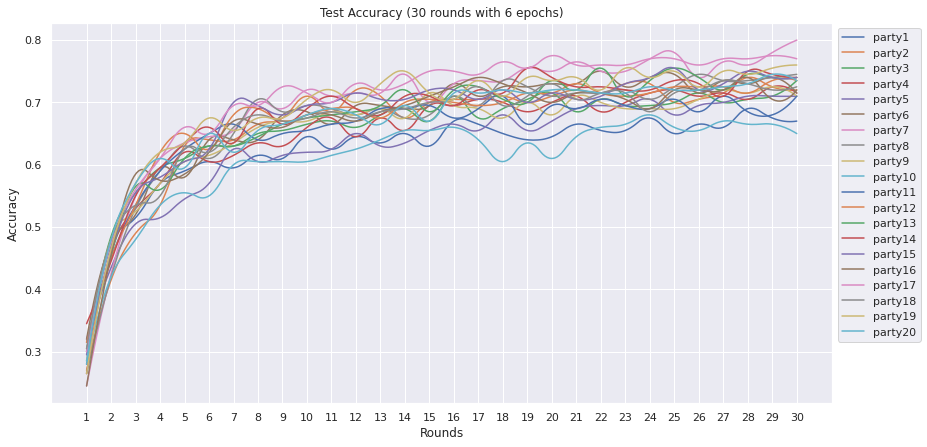

In [6]:
LIST_OF_ROUNDS = range(1, ROUNDS + 1)
f = plt.figure(figsize=(14, 7))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_ROUNDS, eval_party_acc[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Test Accuracy ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Accuracy')
plt.xlabel('Rounds')
plt.xticks(LIST_OF_ROUNDS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('test_accuracy.png', dpi=200)
plt.show()

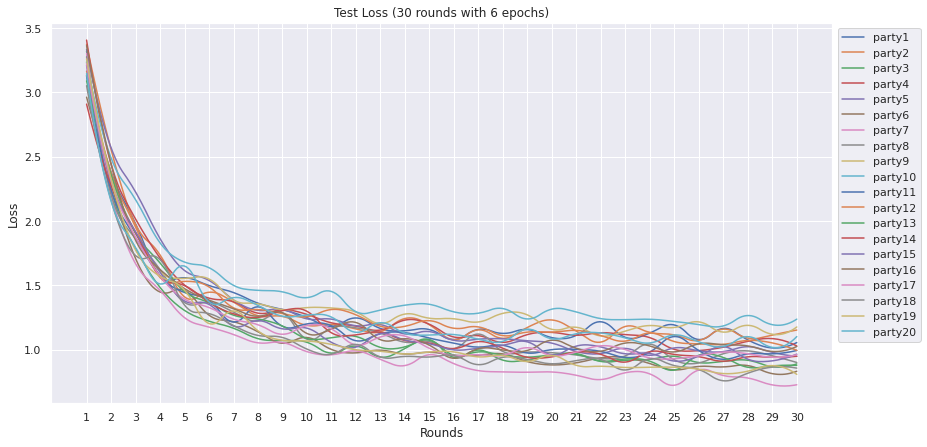

In [7]:
LIST_OF_ROUNDS = range(1, ROUNDS + 1)
f = plt.figure(figsize=(14, 7))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_ROUNDS, eval_party_loss[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Test Loss ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Loss')
plt.xlabel('Rounds')
plt.xticks(LIST_OF_ROUNDS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('test_loss.png', dpi=200)
plt.show()

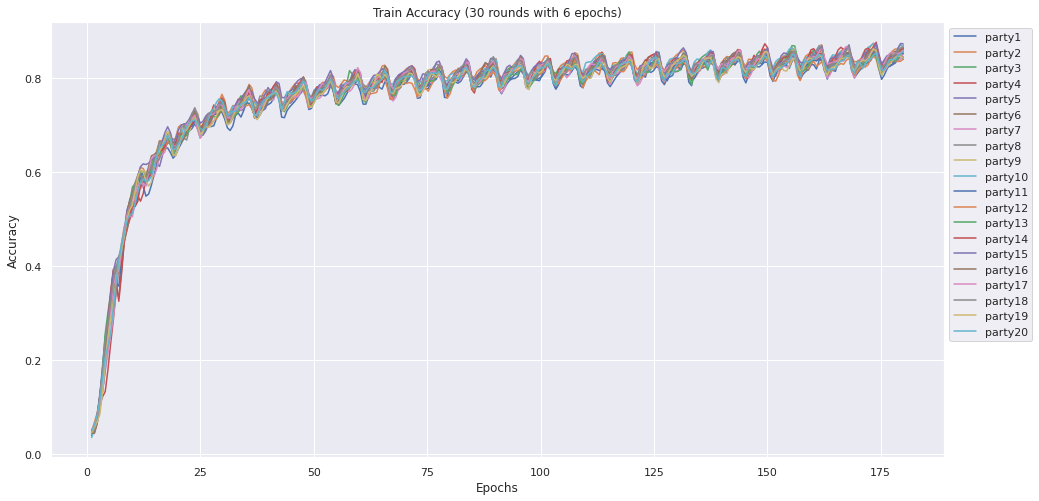

In [8]:
LIST_OF_EPOCHS = range(1, EPOCHS * ROUNDS + 1)
f = plt.figure(figsize=(16, 8))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_EPOCHS, train_party_acc[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Train Accuracy ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
# plt.xticks(LIST_OF_EPOCHS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('train_accuracy.png', dpi=200)
plt.show()

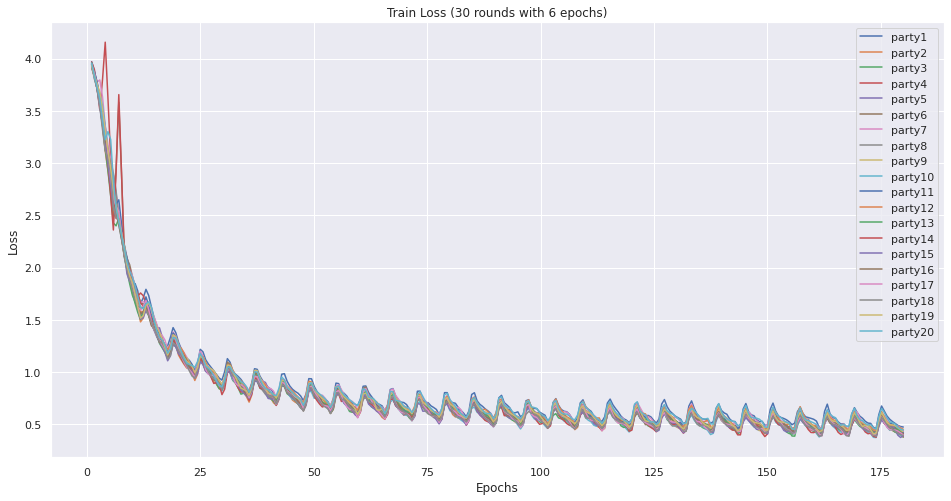

In [9]:
LIST_OF_EPOCHS = range(1, EPOCHS * ROUNDS + 1)
f = plt.figure(figsize=(16, 8))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_EPOCHS, train_party_loss[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Train Loss ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Loss')
plt.xlabel('Epochs')
# plt.xticks(LIST_OF_EPOCHS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('train_loss.png', dpi=200)
plt.show()

In [11]:
aggregator.model_synch()

2021-06-06T13:23:06.811Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating global model sync requests.
2021-06-06T13:23:06.814Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Sync Global Model<ibmfl.model.model_update.ModelUpdate object at 0x7f162abddb00>
2021-06-06T13:23:06.814Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-06T13:23:08.263Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-06T13:23:08.263Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-06T13:23:08.264Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-06T13:23:08.264Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Finished sync model requests


In [12]:
aggregator.eval_model()

2021-06-06T13:23:10.483Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating evaluation requests.
2021-06-06T13:23:10.484Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-06T13:23:11.900Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-06T13:23:11.901Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-06T13:23:11.901Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-06T13:23:11.901Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Finished evaluate model requests.
2021-06-06T13:23:11.902Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Finished eval requests


In [13]:
aggregator.save_model()

2021-06-06T13:23:28.902Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating save model request.
2021-06-06T13:23:28.903Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-06T13:23:31.925Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-06T13:23:31.926Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-06T13:23:31.926Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-06T13:23:31.927Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Finished saving the models.
2021-06-06T13:23:31.927Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Finished save requests
